In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot 
import seaborn as sns
import warnings

#nltk 
import nltk 



#model 



#pickel


In [2]:
df= pd.read_csv('spam-2.csv')[['v1','v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.iloc[2,1]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [4]:
df.shape

(5572, 2)

#1.Data clearning 
#2.EDA 
#3.text Preprocessing 
#4.Model Building 
#5.Evaluation 
#6.Imporvement 
#7.Website 
#8.Deploy 

## Date Clearning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
# drop last 3 colums 
#df.drop(columns =[''])


In [7]:
#Rename 
df.rename(columns={'v1':'target','v2':'Text'},inplace=True)

In [8]:
df.head()

,target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.preprocessing import LabelEncoder 
encoder =LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing value 
df.isnull().sum()

target    0
Text      0
dtype: int64

In [13]:
# check for duplicate value 
df.duplicated().sum()

403

In [14]:
#remove duplicate value 
df=df.drop_duplicates(keep='first')

In [15]:
# check for duplicate value 
df.duplicated().sum()

0

# 2.EDA

In [16]:
# % ham ,scamp

In [17]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [18]:
#implace Data

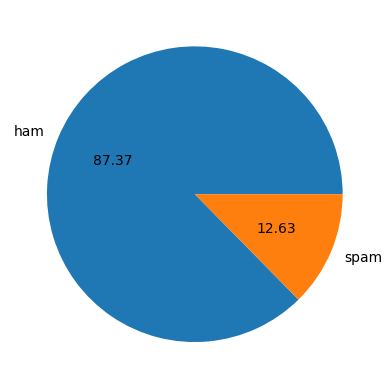

In [19]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%.2f')
plt.show()

In [20]:
# Data is imblace 

In [21]:
import nltk 

In [22]:
df['num_chartacter']=df['Text'].apply(len)

In [23]:
df.head()

,target,Text,num_chartacter
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
#number of word
df['num_word']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,Text,num_chartacter,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
#number of word

df['num_sent']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,Text,num_chartacter,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_chartacter',	'num_word'	,'num_sent']].describe()

,num_chartacter,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df['target']==0][['num_chartacter',	'num_word'	,'num_sent']].describe()

,num_chartacter,num_word,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [31]:
df[df['target']==1][['num_chartacter',	'num_word'	,'num_sent']].describe()

,num_chartacter,num_word,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


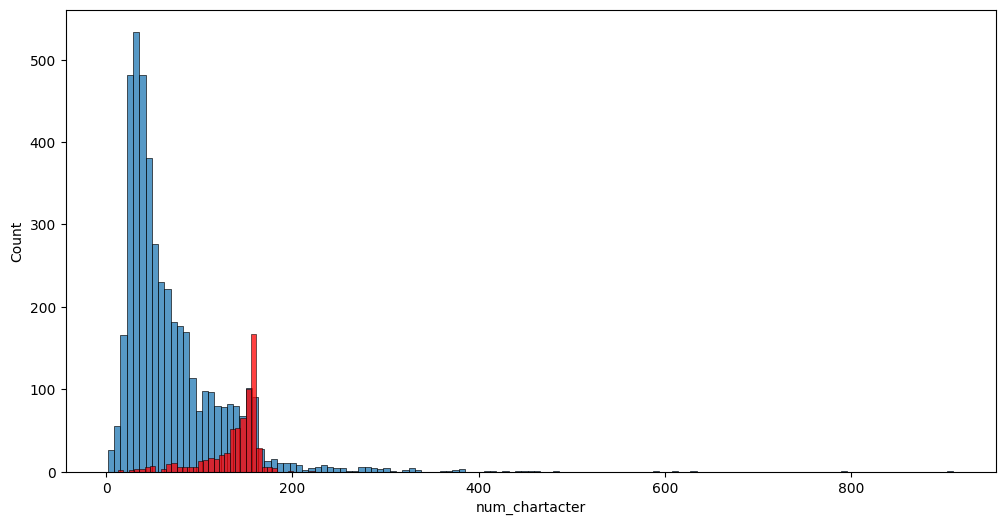

In [32]:
#plot histogram 
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_chartacter'])
sns.histplot(df[df['target']==1]['num_chartacter'],color='red')
plt.show()
#scap message takes more chartacter

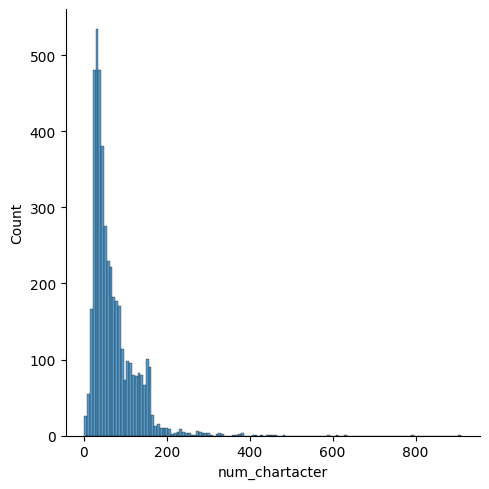

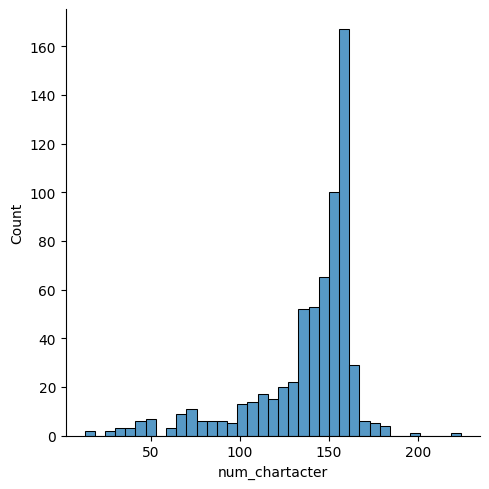

In [33]:
#plot histogram 
#smap
sns.displot(df[df['target']==0]['num_chartacter'])
sns.displot(df[df['target']==1]['num_chartacter'])

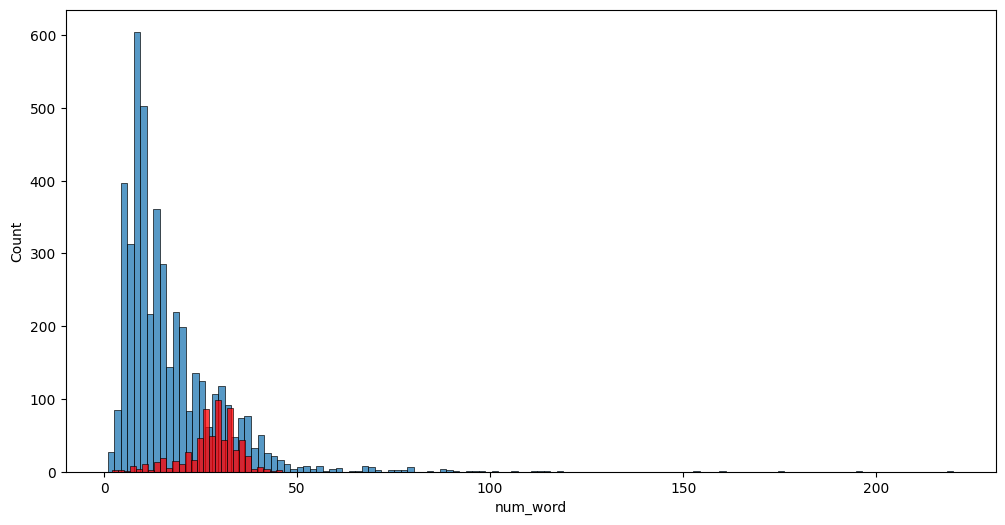

In [34]:
#more number of line in the scample word for 'scamp
#plot histogram 
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_word'])
sns.histplot(df[df['target']==1]['num_word'],color='red')
plt.show()
#scap message takes more chartacter

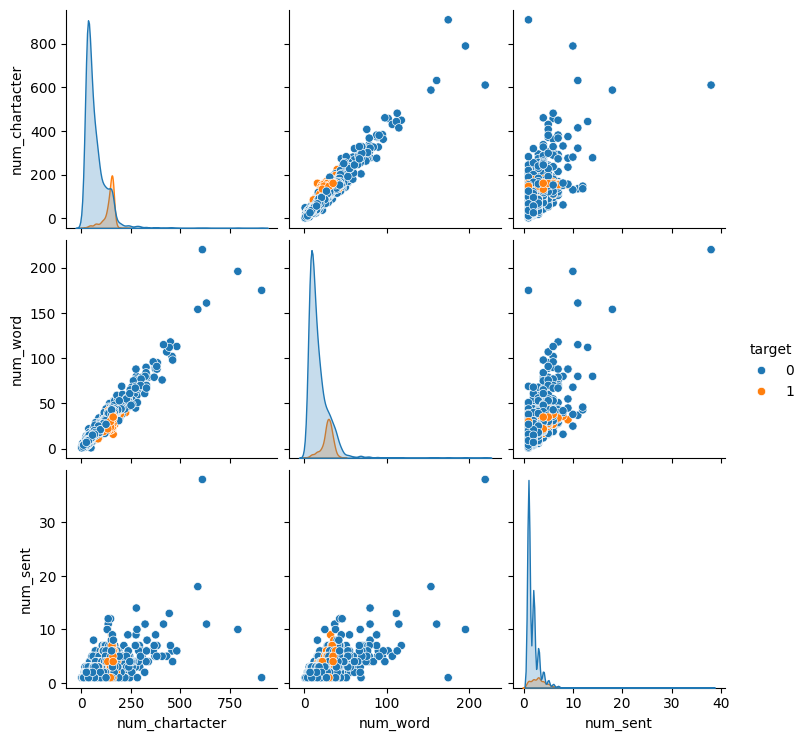

In [35]:
sns.pairplot(df,hue='target')

<Axes: >

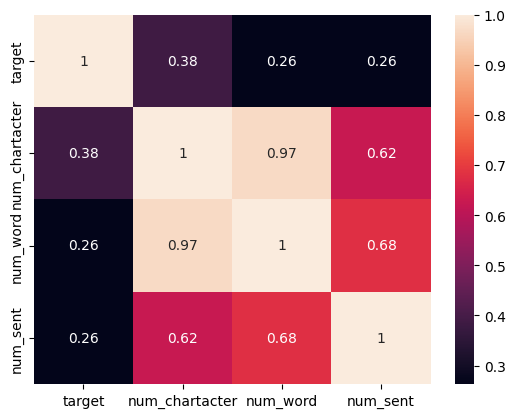

In [36]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(),annot=True)

In [37]:
numeric_df

,target,num_chartacter,num_word,num_sent
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1
...,...,...,...,...
5567,1,161,35,4
5568,0,37,9,1
5569,0,57,15,2
5570,0,125,27,1


<h1>Data Preprocessing</h1>
    <ul>
        <li>Lower case</li>
        <li>Tokenization</li>
        <li>Removeing sepecail puncation</li>
        <li>Stemming</li>
    </ul>

# Text preprcoseecing

In [45]:
import string 
string.punctuation

from nltk.corpus import stopwords
#stopwords.words('english') list of stopword
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
print(ps.stem("dacing"))
print(ps.stem("Loveing"))

dace
love


In [51]:
def transforming_text(text): 
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:] 
    y.clear()

    for  i in text: 
        if i not in stopwords.words('english') and i not in string.punctuation: 
            y.append(i)
    text=y[:] 
    y=[]

    for i in text: 
        y.append(ps.stem(i))
        
    
    #steiming
    #print(y)
    return " ".join(y)

In [ ]:
transforming_text("HI HOW ARE YOU") # lower case

In [ ]:
transforming_text("HI HOW ARE YOU") #tockinse

In [42]:
transforming_text('hi 43434')

['hi', '43434']

In [41]:
transforming_text("hi i am deepraj")

['hi', 'deepraj']

In [53]:
transforming_text("I loved the YT leactueres on machine Learning")

'love yt leactuer machin learn'

In [55]:
df['transformed_string']=df['Text'].apply(transforming_text)

In [57]:
df.head(3)

,target,Text,num_chartacter,num_word,num_sent,transformed_string
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [61]:
# word cloud in string 
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [62]:
span_wc=wc.generate(df[df['target']==1]['transformed_string'].str.cat(sep=" "))

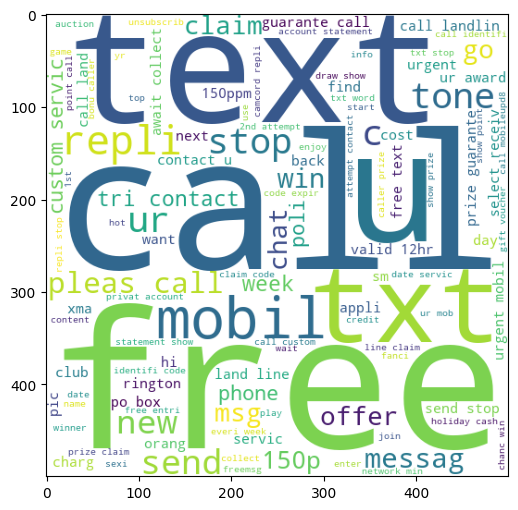

In [64]:
plt.figure(figsize=(15,6))
plt.imshow(span_wc)

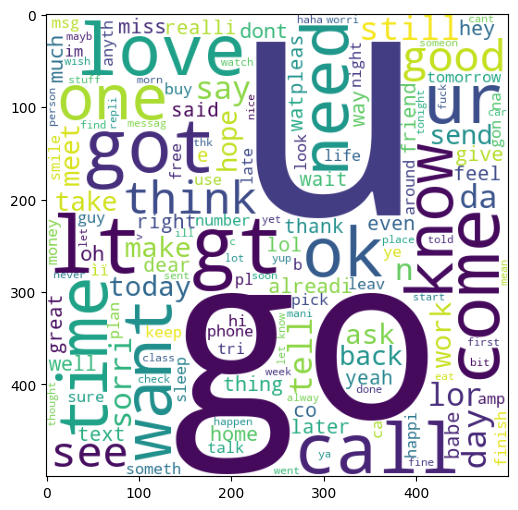

In [65]:
span_wc=wc.generate(df[df['target']==0]['transformed_string'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(span_wc)

In [68]:
# top 30 word using hamp and scmp
spam_corpus=[]
for mes in df[df['target']==1]['transformed_string'].tolist(): 
    for word in mes.split(): 
        spam_corpus.append(word)

In [70]:
len(spam_corpus)

9939

In [72]:
from collections import Counter 
# Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [78]:
pd.DataFrame(Counter(spam_corpus).most_common(30))[0]

0        call
1        free
2           2
3         txt
4        text
5           u
6          ur
7       mobil
8        stop
9       repli
10      claim
11          4
12      prize
13        get
14        new
15     servic
16       tone
17       send
18     urgent
19      nokia
20    contact
21      award
22      phone
23       cash
24      pleas
25       week
26        win
27          c
28    collect
29        min
Name: 0, dtype: object

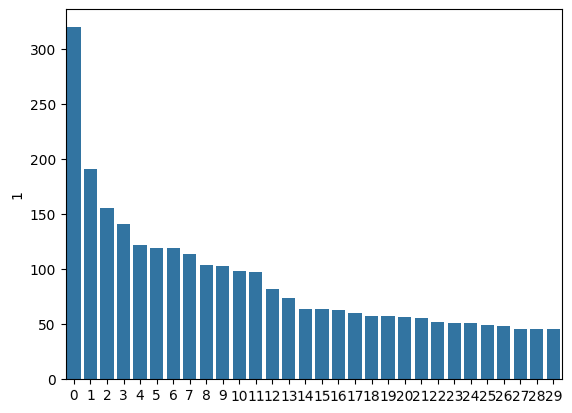

In [84]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1],label=pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation=True)
plt.show()

In [90]:
# top 30 word using hamp and scmp
ham_corpus=[]
for mes in df[df['target']==0]['transformed_string'].tolist(): 
    for word in mes.split(): 
        ham_corpus.append(word)
len(ham_corpus)

35404

In [87]:
#spam_corpus

In [91]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

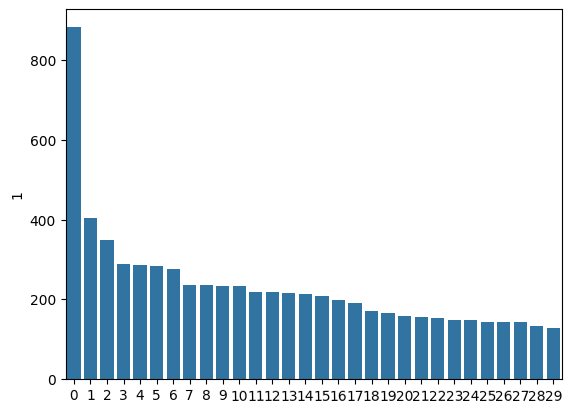

In [92]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[1],label=pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation=True)
plt.show()

# 4.model Building

In [93]:
# convert word to numcrcal

In [112]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
cv =CountVectorizer()
tfidf=TfidfVectorizer()

In [121]:
X =tfidf.fit_transform(df['transformed_string']).toarray()

In [122]:
X.shape

(5169, 6708)

In [123]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [124]:
# from sklearn.model_selection import train_test_split 
# X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [125]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [126]:
gnb = GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB() 

In [127]:
gnb.fit(X_train,y_train)
y_pre=gnb.predict(X_test)
print(accuracy_score(y_test,y_pre))
print(confusion_matrix(y_test,y_pre))
print(precision_score(y_test,y_pre))

0.8636363636363636
[[772 117]
 [ 24 121]]
0.5084033613445378


In [128]:
mnb.fit(X_train,y_train)
y_pre1=mnb.predict(X_test)
print(accuracy_score(y_test,y_pre1))
print(confusion_matrix(y_test,y_pre1))
print(precision_score(y_test,y_pre1))

0.9613152804642167
[[888   1]
 [ 39 106]]
0.9906542056074766


In [129]:
bnb.fit(X_train,y_train)
y_pre2=bnb.predict(X_test)
print(accuracy_score(y_test,y_pre2))
print(confusion_matrix(y_test,y_pre2))
print(precision_score(y_test,y_pre2))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


<img src='r1.png'>

In [118]:
# using tTfidfVectorizer 
X1 =tfidf.fit_transform(df['transformed_string']).toarray()

In [119]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test =train_test_split(X1,y,test_size=0.2,random_state=42)

In [134]:
mnb=MultinomialNB()

In [135]:
mnb.fit(X_train,y_train)
y_pre1=mnb.predict(X_test)
print(accuracy_score(y_test,y_pre1))
print(confusion_matrix(y_test,y_pre1))
print(precision_score(y_test,y_pre1))

0.9613152804642167
[[888   1]
 [ 39 106]]
0.9906542056074766


In [136]:
import pickle
# pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [137]:
model =pickle.load(open("model.pkl",'rb'))

In [140]:
X_train[0]

array([0., 0., 0., ..., 0., 0., 0.])